# Belal Khaled - 2136873
## NN & Deep Learning Assignment 02: 
### " NN Training ".

#  ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Import Pandas and Numpy Libraries:

In [1]:
import pandas as pd
import numpy as np

# • Loading the dataset:

In [2]:
DataSet = pd.read_csv('moonDataset.csv')

#  ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Separating inputs and labels:

In [3]:
X = DataSet[['X1', 'X2', 'X3']].values
y = DataSet['label'].values.reshape(-1, 1)

In [13]:
type(y)

numpy.ndarray

# • Initialize weights and biases:

In [4]:
weights_hidden = np.array([[0.2, -0.3], [0.4, 0.1], [-0.5, 0.2]])
weights7_8 = np.array([[-0.3], [-0.2]])
bias1_2 = np.array([[-0.4, 0.2]])
bias3 = np.array([[0.1]])

# • Define learning rate and epochs:

In [5]:
learning_rate = 0.1
epochs = 20

#  ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Sigmoid function and its derivative:

In [6]:
def sigmoid(x):
    
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    
    return x * (1 - x)

# • Forward Pass Function:

In [7]:
def forward_pass(X):
    
    H1_H2 = np.dot(X, weights_hidden) + bias1_2
    Sig_H1_H2 = sigmoid(H1_H2)
    
    output = np.dot(Sig_H1_H2, weights7_8) + bias3
    predicted = sigmoid(output)
    
    return Sig_H1_H2, predicted


# • Backward Pass (SGD) Function:
####            ♠ Calculating the error.
####            ♣ Calculating derivatives.
####            ♦ Updating weights and biases.

In [8]:
def backward_pass(X, y, Sig_H1_H2, predicted, weights_hidden, 
                  weights7_8, bias1_2, bias3):
    
    error = y - predicted

    D_predicted = error * sigmoid_derivative(predicted)
    error_hidden = D_predicted.dot(weights7_8.T)
    D_hidden = error_hidden * sigmoid_derivative(Sig_H1_H2)

    weights_hidden += learning_rate * X.T.dot(D_hidden)
    bias1_2 += learning_rate * np.sum(D_hidden, axis=0, keepdims=True)
    weights7_8 += learning_rate * Sig_H1_H2.T.dot(D_predicted)
    bias3 += learning_rate * np.sum(D_predicted, axis=0, keepdims=True)

    return weights_hidden, weights7_8, bias1_2, bias3


#  ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Training the model:

In [9]:
Loss_Log = []
for epoch in range(epochs):
    Sig_H1_H2, predicted = forward_pass(X)
    loss = np.mean(np.square(y - predicted)) # ==> (MSE)
    Loss_Log.append(loss)
    weights_hidden, weights7_8, bias1_2, bias3 = backward_pass(X, y, Sig_H1_H2, 
                                                 predicted, weights_hidden, 
                                                 weights7_8, bias1_2, bias3)


#  ـــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Import matplotlib Library:

In [10]:
import matplotlib.pyplot as plt

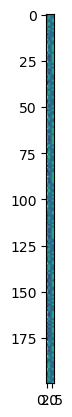

In [11]:
plt.imshow(DataSet)

# • Plot the loss after each epoch:

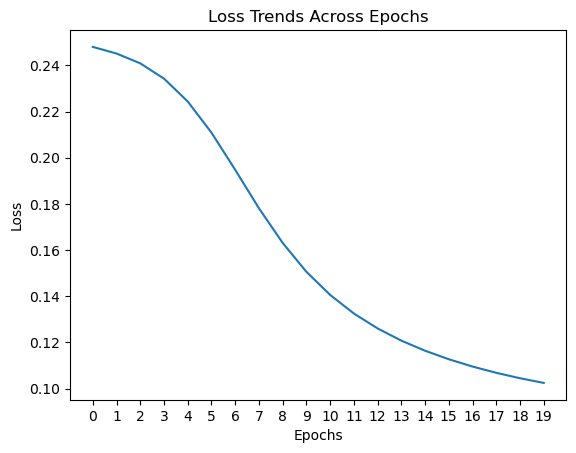

In [12]:
plt.plot(Loss_Log)
plt.title('Loss Trends Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(len(Loss_Log)))
plt.show()
